In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

import seaborn as sns

# Load Data

In [2]:
X_train0 = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv', index_col='Id')
X_test0 = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv', index_col='Id')

**Look at data**

In [3]:
#print(len(X_train0))
#print(len(X_test0))

#compare columns bewtween Train and Test sets
print(list(set(X_train0.columns) - set(X_test0.columns)) + list(set(X_test0.columns) - set(X_train0.columns)))

['SalePrice']


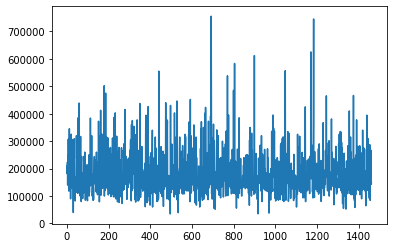

In [4]:
import matplotlib.pyplot as plt
#PLOT PRICES
plt.plot(X_train0['SalePrice'])
plt.show()

In [5]:
#CREATE RESUME TABLE
def df_info(df):
    len_df = len(df)
    sample = []
    p_nan = []
    corrSP = []
    all_uniq = []
    for i in df.columns:
        head_col = str(list(df[i].head(5)))
        sample.append(head_col)
        all_nan = df[i].isna().sum() #.sum()
        if all_nan == len_df:
            p_nan.append(100)
        elif all_nan == 0:
            p_nan.append(0)
        else:
            p_nan.append(round(all_nan / len_df * 100, 2))
         
        if df[i].nunique() <= 5:
            all_uniq.append(str(list(set(df[i]))))
        else:
            all_uniq.append("Several")
 
    if 'SalePrice' in df:
        corrSP = df.corr(method='pearson').SalePrice
    else:
        corrSP = np.nan

    list_of_numerics = df.select_dtypes(include = ['float','int']).columns
    outl = df.apply(lambda x: sum(
                     (x<(x.quantile(0.05) - 1.5 * (x.quantile(0.95)-x.quantile(0.05)))) |
                     (x>(x.quantile(0.95) + 1.5 * (x.quantile(0.95)-x.quantile(0.05))))
                     if x.name in list_of_numerics else '') )

    df_resume = pd.DataFrame({ 
                        'type': list(df.dtypes),
                        'Sample': sample,
                        "% of NaN": p_nan,
                        "Corr_with_y": corrSP,
                        'Duplicates' : (df.duplicated()).sum(),
                        'Amount Uniques' : df.nunique(),
                        'Uniques' : all_uniq,                        
                        'Outliers' : outl } , index = df.columns)
    
    return df_resume

pd.set_option('max_rows', None)

In [6]:
#See resume table
df_info(X_train0)

,type,Sample,% of NaN,Corr_with_y,Duplicates,Amount Uniques,Uniques,Outliers
MSSubClass,int64,"[60, 20, 60, 70, 60]",0.00,-0.084284,0,15,Several,0
MSZoning,object,"['RL', 'RL', 'RL', 'RL', 'RL']",0.00,NaN,0,5,"['RL', 'RH', 'C (all)', 'FV', 'RM']",0
LotFrontage,float64,"[65.0, 80.0, 68.0, 60.0, 84.0]",17.74,0.351799,0,110,Several,2
LotArea,int64,"[8450, 9600, 11250, 9550, 14260]",0.00,0.263843,0,1073,Several,15
Street,object,"['Pave', 'Pave', 'Pave', 'Pave', 'Pave']",0.00,NaN,0,2,"['Pave', 'Grvl']",0
Alley,object,"[nan, nan, nan, nan, nan]",93.77,NaN,0,2,"[nan, 'Pave', 'Grvl']",0
LotShape,object,"['Reg', 'Reg', 'IR1', 'IR1', 'IR1']",0.00,NaN,0,4,"['IR1', 'IR3', 'IR2', 'Reg']",0
LandContour,object,"['Lvl', 'Lvl', 'Lvl', 'Lvl', 'Lvl']",0.00,NaN,0,4,"['HLS', 'Low', 'Lvl', 'Bnk']",0
Utilities,object,"['AllPub', 'AllPub', 'AllPub', 'AllPub', 'AllP...",0.00,NaN,0,2,"['AllPub', 'NoSeWa']",0
LotConfig,object,"['Inside', 'FR2', 'Inside', 'Corner', 'FR2']",0.00,NaN,0,5,"['FR3', 'CulDSac', 'FR2', 'Corner', 'Inside']",0


In [7]:
#See resume table for Test set
#df_info(X_test0)

In [8]:
#Make Some Checks
#X_train0['MSSubClass'].corr(X_train0['SalePrice'],method='pearson') 
#X_train0['Street']
#X_train0['MiscVal']
#X_train0[['PoolArea','PoolQC']]
#str(list(set(X_train0['BedroomAbvGr'])))

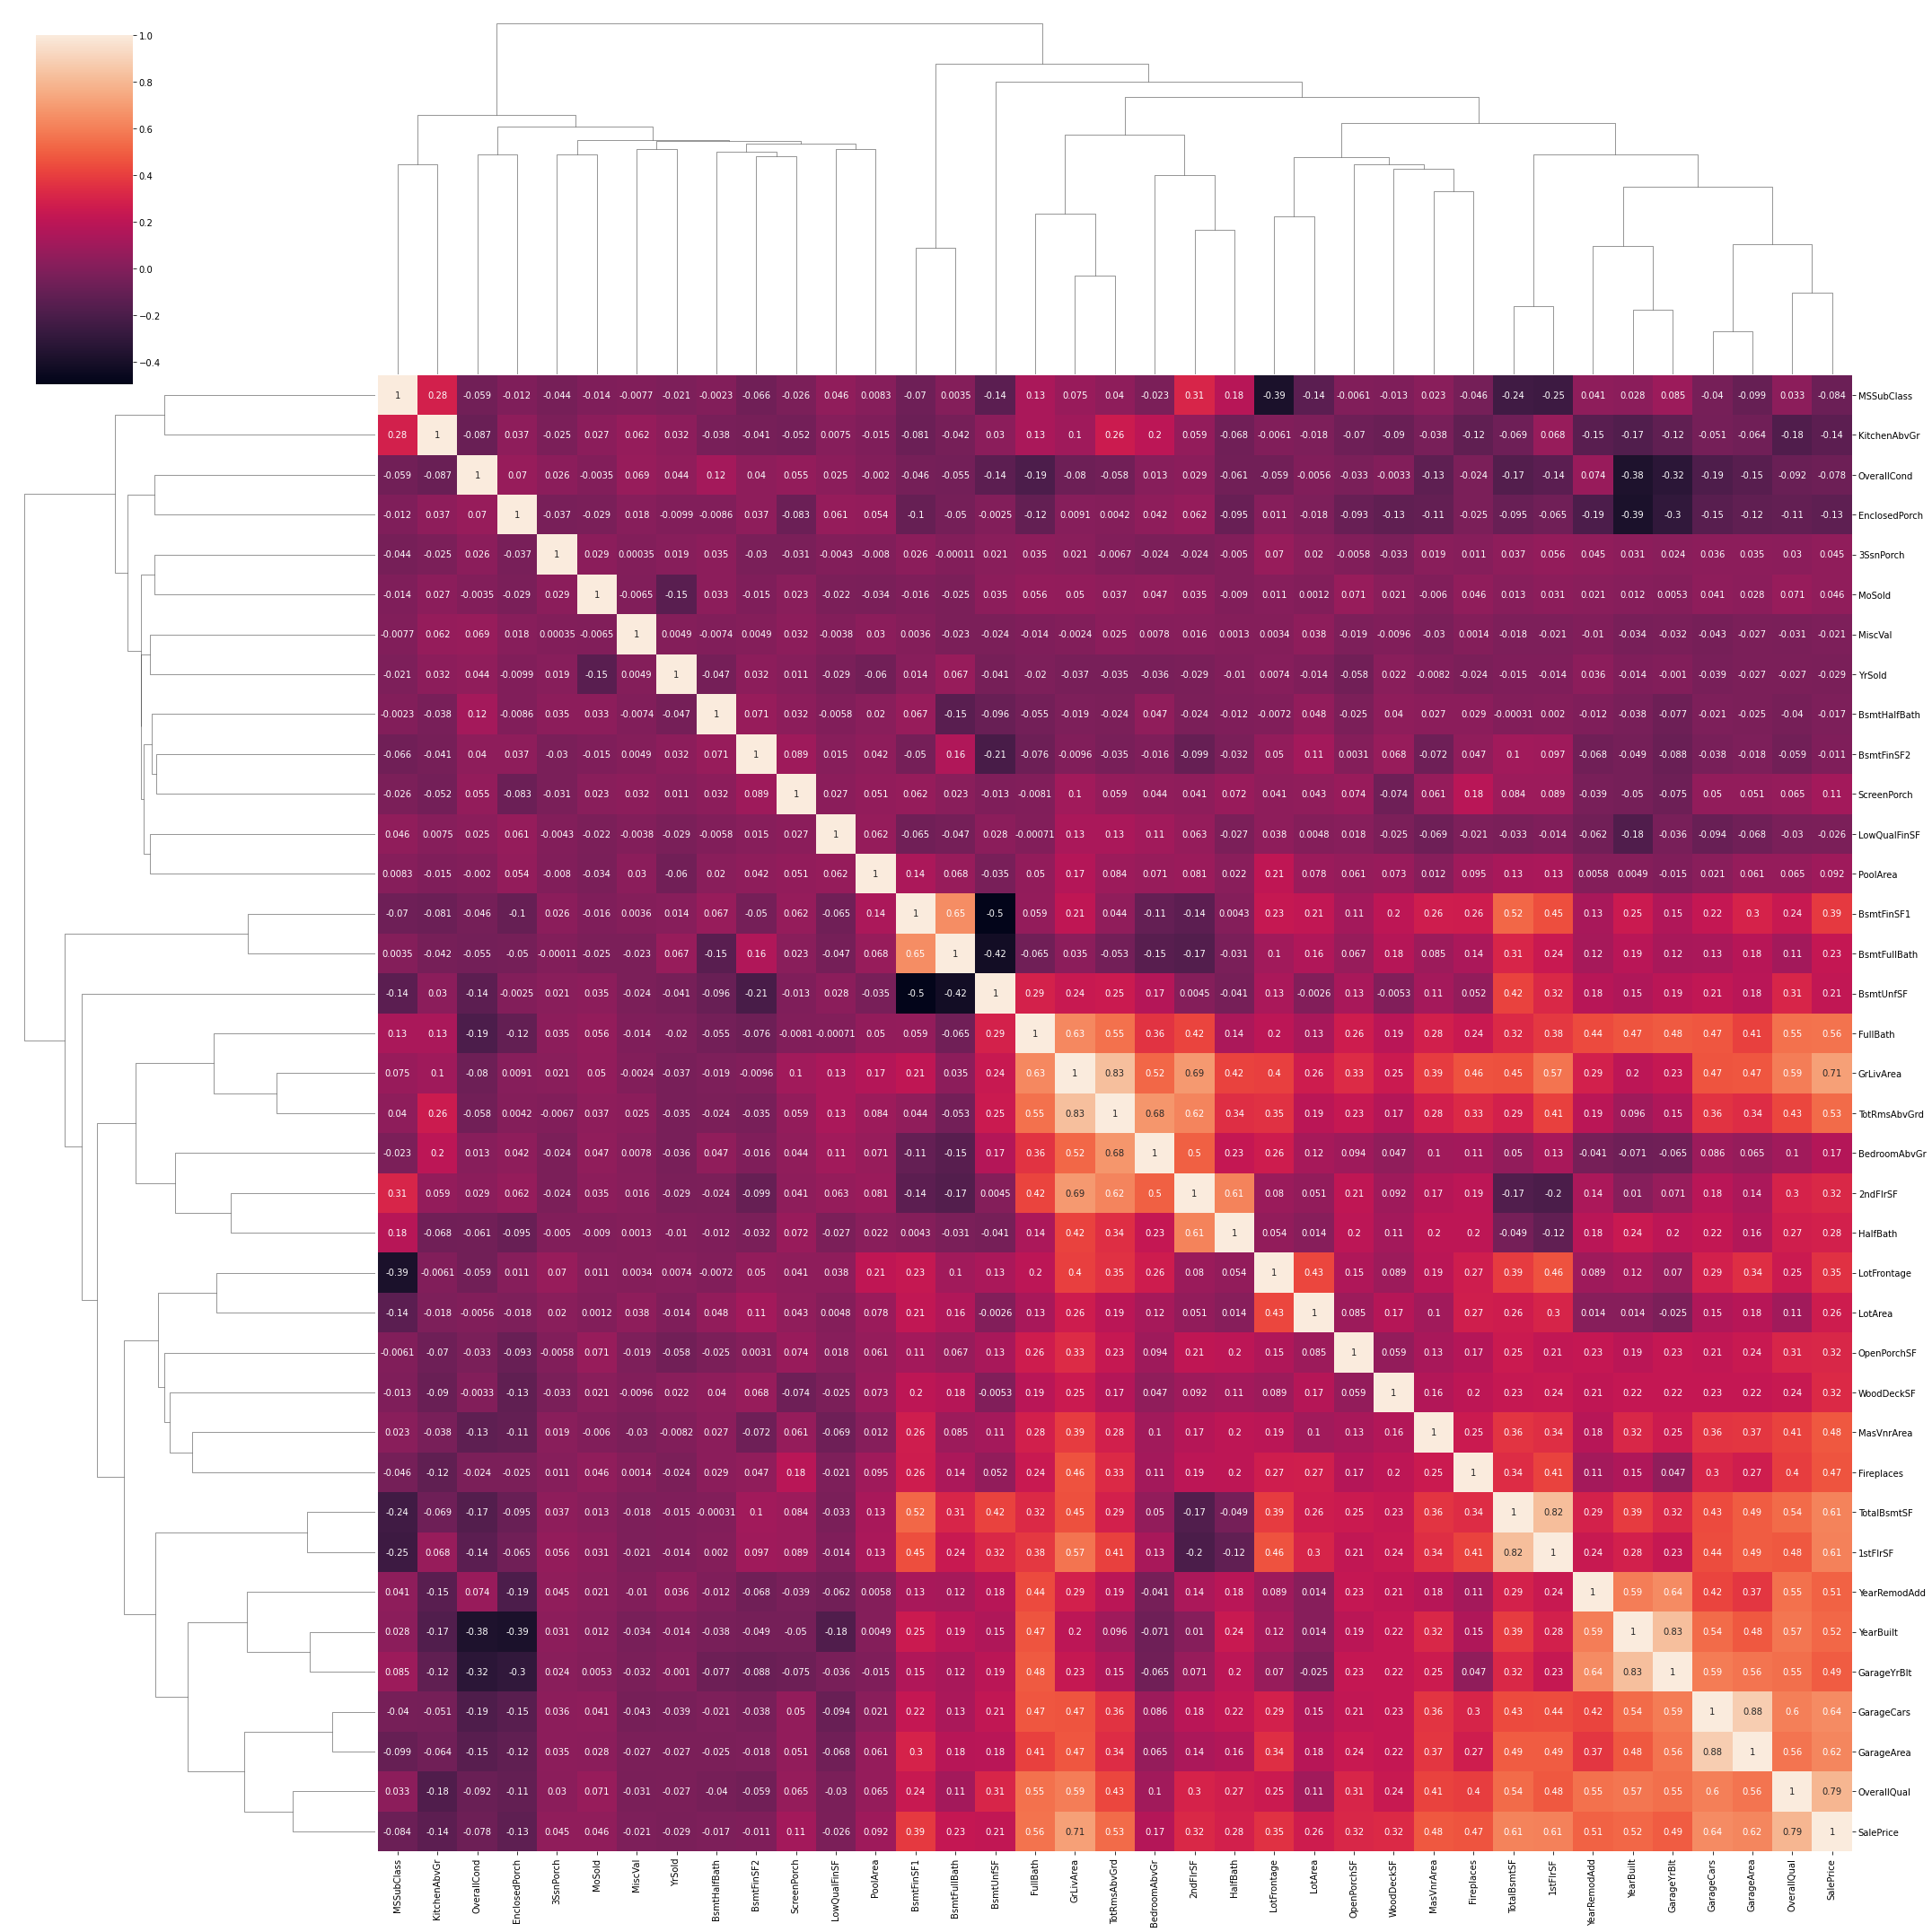

In [9]:
# Visualize corelations
sns.clustermap(X_train0.corr(), figsize=(30,30), annot=True)

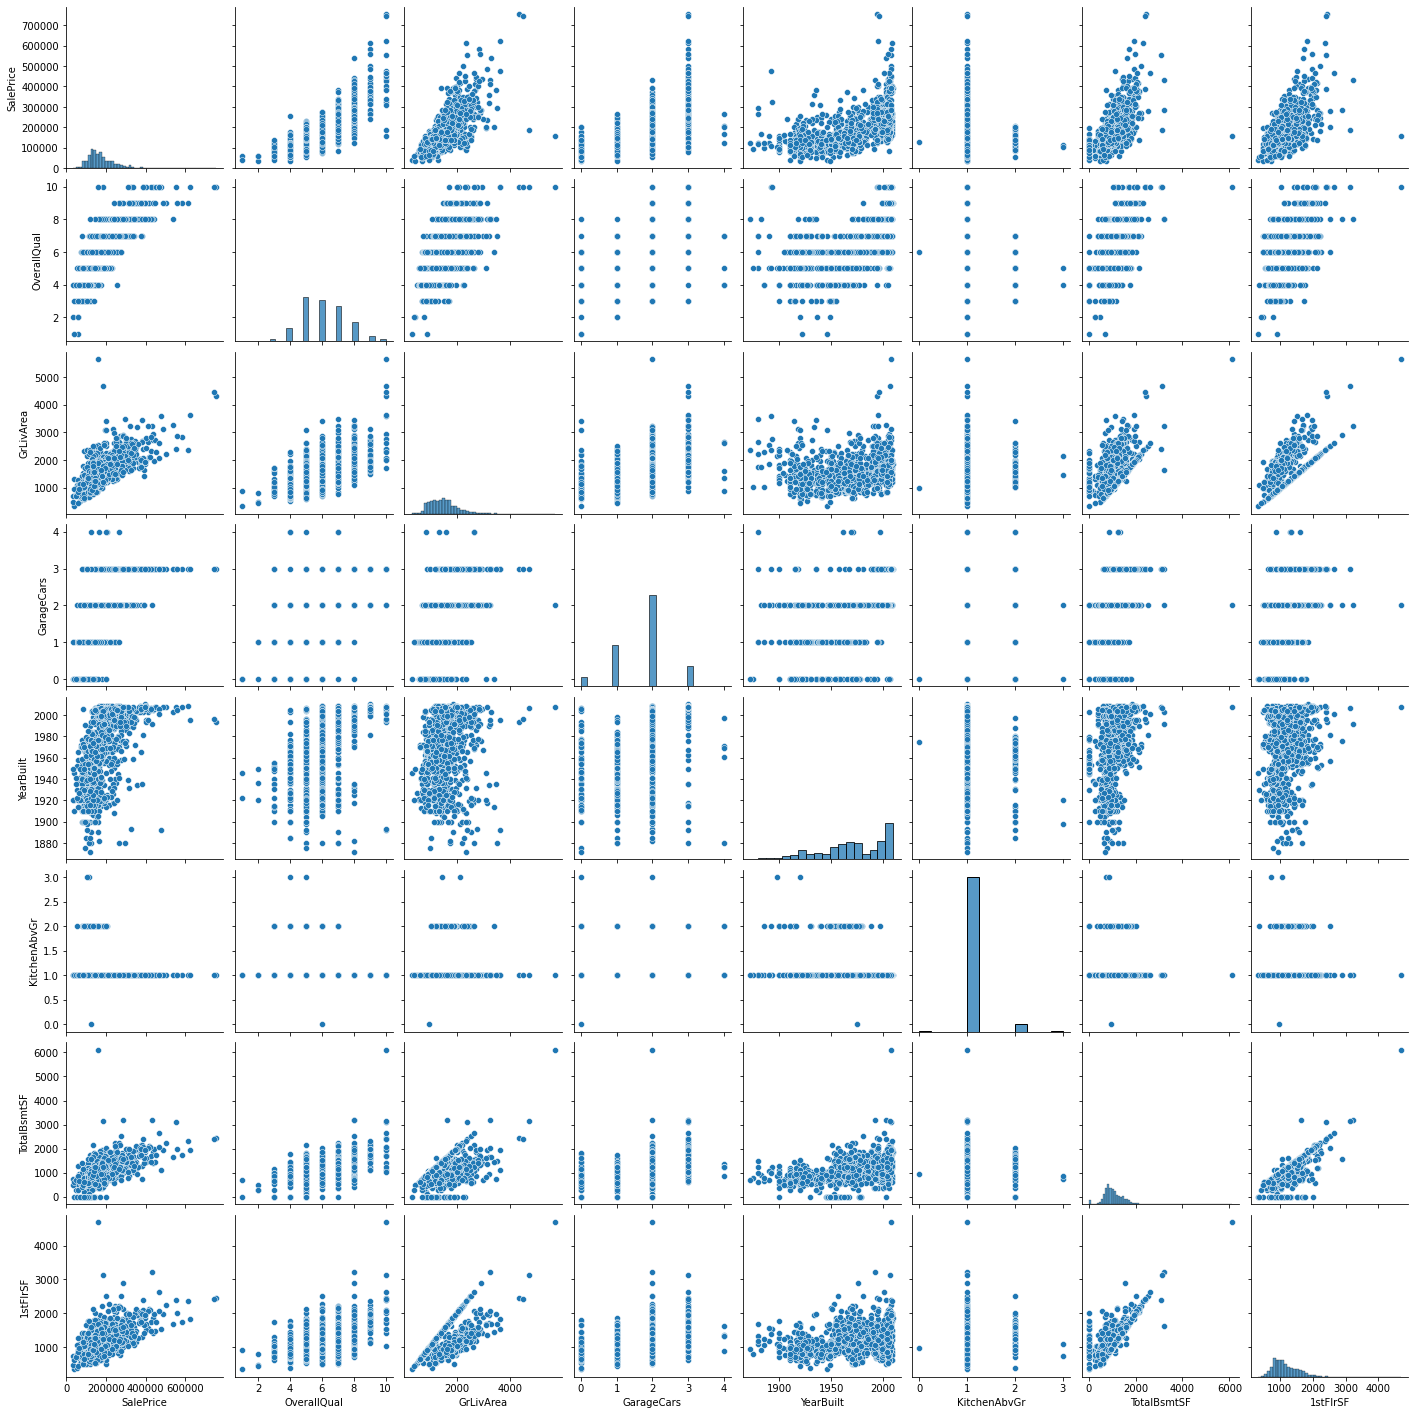

In [10]:
# Visualize variables and outliers in Train set
sns.pairplot(X_train0[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 
                    'YearBuilt', 'KitchenAbvGr', 'TotalBsmtSF','1stFlrSF']])

In [11]:
X_train0[(X_train0['1stFlrSF'] > 4000) | (X_train0['GrLivArea'] > 4000) | (X_train0['TotalBsmtSF'] > 4000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


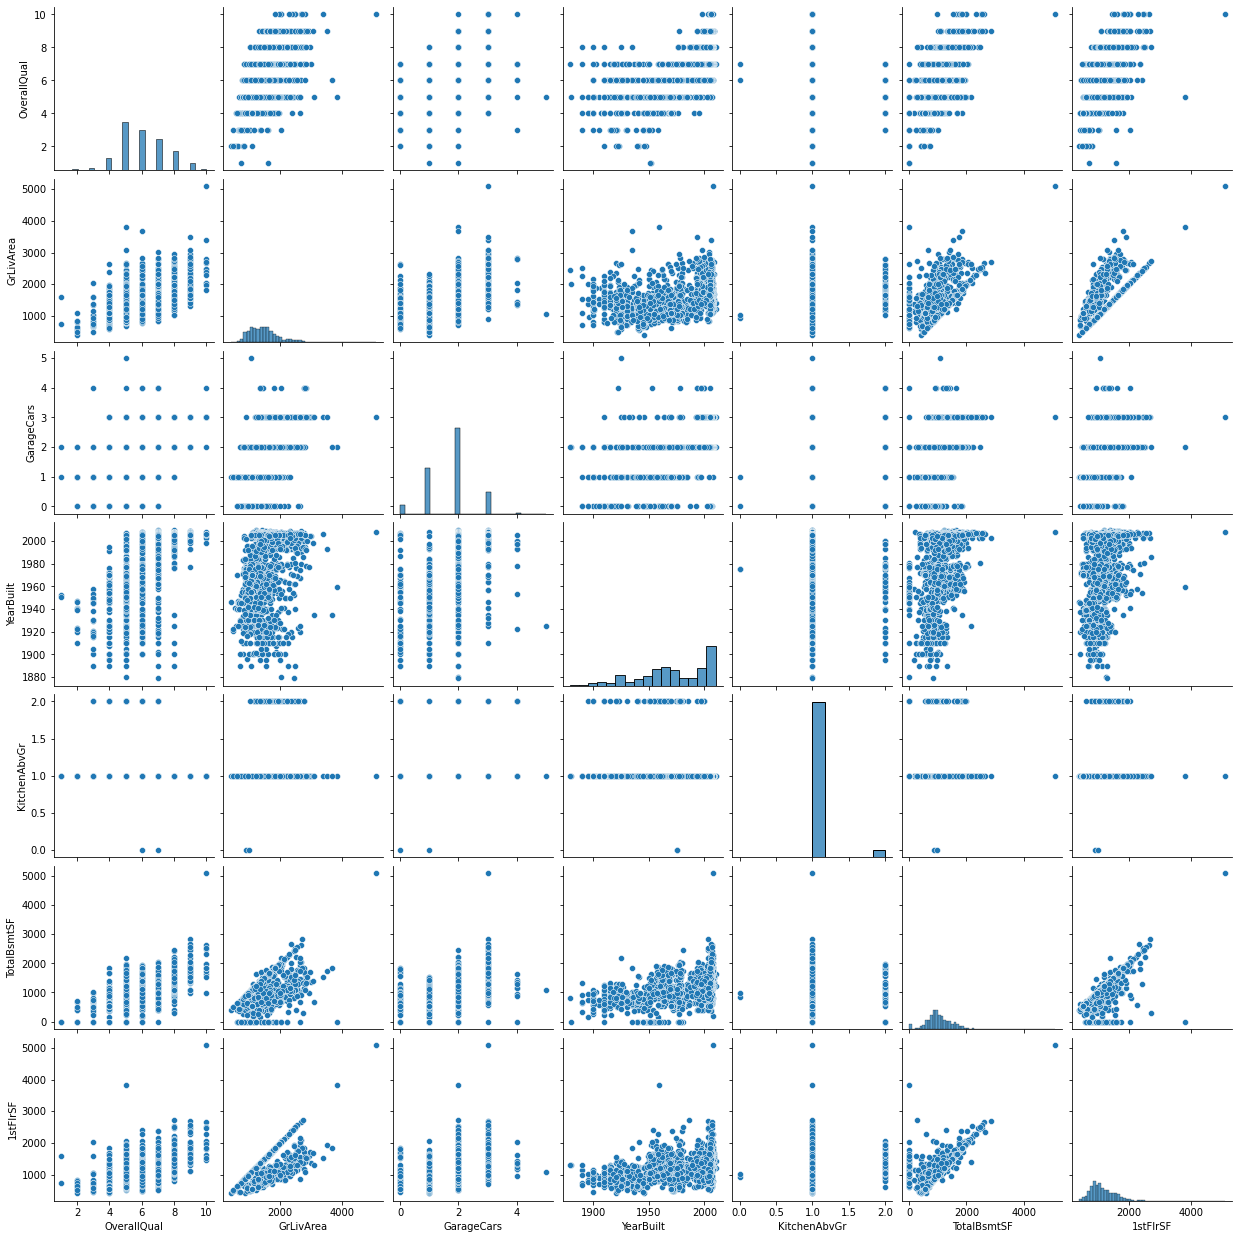

In [12]:
# Visualize variables and outliers in Test set
sns.pairplot(X_test0[['OverallQual', 'GrLivArea', 'GarageCars', 
                    'YearBuilt', 'KitchenAbvGr', 'TotalBsmtSF','1stFlrSF']])

In [13]:
X_test0[(X_test0['1stFlrSF'] > 4000) | (X_test0['GrLivArea'] > 4000) | (X_test0['TotalBsmtSF'] > 4000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
2550,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,0,NaN,NaN,NaN,17000,10,2007,New,Partial


Id = 524, 692, 1183 and 1299 of Train is a outlier, should be removed. <br>
Id = 2550 of Test also seems a outlier, it's final result could possible be better if replaced by a mean SalePrice value.

# (Some) Data transformation and missing values Impute

**Merging Train and Test to treat data simultaneously**

In [14]:
SET_ALL = pd.concat([X_train0, X_test0])

**SOME PRIMARLY CORRECTIONS**

**Drop predictors highly correlated with others**

In [15]:
#Drop TotRmsAbvGrd, it is correlated with GrLivArea. Maintain GrLivArea, has best correlation with with SalePrice.
SET_ALL = SET_ALL.drop(columns="TotRmsAbvGrd")
#Drop TotalBsmtSF, it is correlated with 1stFlrSF. Maintain 1stFlrSF, has best correlation with with SalePrice.
SET_ALL = SET_ALL.drop(columns="TotalBsmtSF")
#Drop GarageYrBlt, it is correlated with YearBuilt. Maintain YearBuilt, has best correlation with with SalePrice.
SET_ALL = SET_ALL.drop(columns="GarageYrBlt")
#Drop GarageArea, it is correlated with GarageCars. Maintain GarageCars, has best correlation with with SalePrice.
SET_ALL = SET_ALL.drop(columns="GarageArea")
#Drop PoolArea, it should be correlated with PoolQC. Maintain PoolQC, categorical variable seems better choice.
SET_ALL = SET_ALL.drop(columns="PoolArea")


**Drop outiler ID = 1299**

In [16]:
SET_ALL = SET_ALL.drop(SET_ALL.index[524])
SET_ALL = SET_ALL.drop(SET_ALL.index[692])
SET_ALL = SET_ALL.drop(SET_ALL.index[1183])
SET_ALL = SET_ALL.drop(SET_ALL.index[1299])

**Categorical predictors stored as numbers -> convert**

In [17]:
SET_ALL['MSSubClass'] = SET_ALL['MSSubClass'].apply(str)
SET_ALL['MoSold'] = SET_ALL['MoSold'].astype(str)

**Feature transformation**

In [18]:
#Half Bathrooms added to bathroom count (i believe it worths more than a half...)
SET_ALL["FullBath"] = SET_ALL["FullBath"] + SET_ALL["HalfBath"]*0.75 
#Drop HalfBath
SET_ALL = SET_ALL.drop(columns="HalfBath")

#BsmtHalfBath added to BsmtFullBath count
SET_ALL["BsmtFullBath"] = SET_ALL["BsmtFullBath"] + SET_ALL["BsmtHalfBath"]*0.75
#Drop HalfBath
SET_ALL = SET_ALL.drop(columns="BsmtHalfBath")

**Impute numeric values using KNN** <br>
**Categorical NaN values simplified as 'others'**

In [19]:
from pandas.api.types import is_numeric_dtype
from sklearn.impute import KNNImputer

def df_impute(df):
    categorical_columns = []
    numeric_columns = []
    for i in df.columns:
        if i != 'ind':
            if is_numeric_dtype(df[i]) == True: #check if it is numeric
                numeric_columns.append(i)
            else:                                  #check if it NOT numeric, INCLUDING numeric to be transformed as categorical
                categorical_columns.append(i)

    #create two DataFrames, one for each data type
    data_numeric0 = df[numeric_columns]
    data_categorical0 = df[categorical_columns]
    
    imp = KNNImputer(n_neighbors=2, weights="uniform")
    data_numeric1 = imp.fit_transform(data_numeric0)
    data_numeric = pd.DataFrame(data_numeric1, columns = data_numeric0.columns) #only apply imputer to numeric columns
    
    data_categorical1 = data_categorical0.replace(np.nan,"Other")
    data_categorical = pd.DataFrame(data_categorical1, columns = data_categorical0.columns)

    #join the two masked dataframes back together
    data_numeric.reset_index(drop=True, inplace=True)
    data_categorical.reset_index(drop=True, inplace=True)
    df_i = pd.concat([data_numeric, data_categorical], axis = 1)
    
    return df_i

**Impute missing values**

In [20]:
SET_ALL = df_impute(SET_ALL)
SET_ALL.index = np.arange(1, len(SET_ALL) + 1)

#Check table after impute
df_info(SET_ALL).head(20)

,type,Sample,% of NaN,Corr_with_y,Duplicates,Amount Uniques,Uniques,Outliers
LotFrontage,float64,"[65.0, 80.0, 68.0, 60.0, 84.0]",0,0.380808,0,203,Several,2
LotArea,float64,"[8450.0, 9600.0, 11250.0, 9550.0, 14260.0]",0,0.292990,0,1949,Several,24
OverallQual,float64,"[7.0, 6.0, 7.0, 7.0, 8.0]",0,0.715705,0,10,Several,0
OverallCond,float64,"[5.0, 8.0, 5.0, 5.0, 5.0]",0,-0.131454,0,9,Several,0
YearBuilt,float64,"[2003.0, 1976.0, 2001.0, 1915.0, 2000.0]",0,0.499672,0,118,Several,0
YearRemodAdd,float64,"[2003.0, 1976.0, 2002.0, 1970.0, 2000.0]",0,0.471198,0,61,Several,0
MasVnrArea,float64,"[196.0, 0.0, 162.0, 0.0, 350.0]",0,0.485972,0,451,Several,6
BsmtFinSF1,float64,"[706.0, 978.0, 486.0, 216.0, 655.0]",0,0.431569,0,991,Several,2
BsmtFinSF2,float64,"[0.0, 0.0, 0.0, 0.0, 0.0]",0,-0.022093,0,272,Several,6
BsmtUnfSF,float64,"[150.0, 284.0, 434.0, 540.0, 490.0]",0,0.197230,0,1134,Several,0


# Encode categorical data

**Using One-Hot-Encoder**

In [21]:
import category_encoders as ce

def df_encode(df):
    cat_cols = []
    for i in df.columns:
        if is_numeric_dtype(df[i]) == False:  #check if object
            cat_cols.append(i)
    print(cat_cols)
    encoder=ce.OneHotEncoder(cols=cat_cols,handle_unknown='return_nan',return_df=True) #,use_cat_names=True)
    data_encoded = encoder.fit_transform(df)
    
    return data_encoded

**Merging Train and Test to encode simultaneously - avoid model not being able to fit Test set**

In [22]:
SET_ALL = df_encode(SET_ALL)
SET_ALL.index = np.arange(1, len(SET_ALL) + 1)

#Check table after encode
df_info(SET_ALL).tail(20)

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition']


/opt/conda/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,type,Sample,% of NaN,Corr_with_y,Duplicates,Amount Uniques,Uniques,Outliers
MoSold_9,float64,"[0.0, 0.0, 0.0, 0.0, 0.0]",0,0.024479,0,2,"[0.0, 1.0]",122
MoSold_10,float64,"[0.0, 0.0, 0.0, 0.0, 0.0]",0,0.013633,0,2,"[0.0, 1.0]",0
MoSold_11,float64,"[0.0, 0.0, 0.0, 0.0, 0.0]",0,0.000583,0,2,"[0.0, 1.0]",0
MoSold_12,float64,"[0.0, 0.0, 0.0, 0.0, 0.0]",0,-0.003532,0,2,"[0.0, 1.0]",0
SaleType_1,float64,"[1.0, 1.0, 1.0, 1.0, 1.0]",0,-0.195417,0,2,"[0.0, 1.0]",0
SaleType_2,float64,"[0.0, 0.0, 0.0, 0.0, 0.0]",0,0.316031,0,2,"[0.0, 1.0]",0
SaleType_3,float64,"[0.0, 0.0, 0.0, 0.0, 0.0]",0,-0.075711,0,2,"[0.0, 1.0]",87
SaleType_4,float64,"[0.0, 0.0, 0.0, 0.0, 0.0]",0,-0.041771,0,2,"[0.0, 1.0]",26
SaleType_5,float64,"[0.0, 0.0, 0.0, 0.0, 0.0]",0,-0.002963,0,2,"[0.0, 1.0]",9
SaleType_6,float64,"[0.0, 0.0, 0.0, 0.0, 0.0]",0,-0.002339,0,2,"[0.0, 1.0]",12


**Separate Train and Test data again**

In [23]:
X_train = SET_ALL.iloc[:1456,:] #1460 - 4(dropped)
X_test = SET_ALL.iloc[1456:,:] #1460 - 4(dropped)

**More Data Treatment and Cleansing** <br>
Necessary... but that is maybe for another day! ⏲️

# CatBoost Model

**Train and Test Split**

In [24]:
from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score

y = X_train.SalePrice
X = X_train.drop(['SalePrice'], axis = 1)

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25)

RMS:  25269.026497277177


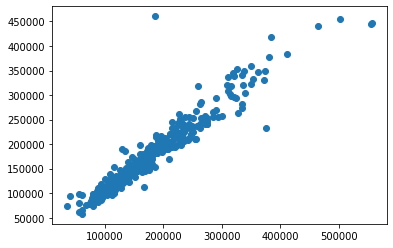

In [25]:
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error

train_pool = Pool(train_X, 
                  train_y)
test_pool = Pool(test_X) 

modelCB = CatBoostRegressor(iterations=2000,
                           depth=8,
                           learning_rate=0.05,
                           loss_function='RMSE',
                           silent=True)

modelCB.fit(train_pool)
preds1 = modelCB.predict(test_pool)

# evaluate predictions
rms1 = mean_squared_error(test_y, preds1, squared=False) #np.sqrt(np.mean((preds1 - test_y) ** 2))
print("RMS: ", rms1)
#print(preds1)

g=plt.scatter(test_y, preds1)

# XGBoost Model

[23:10:24] WARNING: ../src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


RMS:  32386.409227457614


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


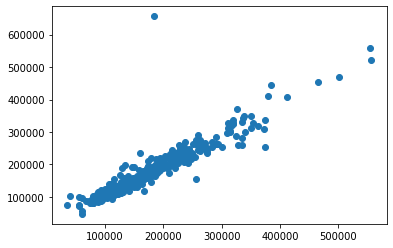

In [26]:
from xgboost import XGBRegressor

train_X2 = train_X.values
train_y2 = train_y.values

modelXGB = XGBRegressor(n_estimators=1000, learning_rate=0.05, silent=True)
modelXGB.fit(train_X2, train_y2)

test_X2 = test_X.values
test_y2 = test_y.values

y_pred = modelXGB.predict(test_X2)
preds2 = [round(value) for value in y_pred]

# evaluate predictions
rms2 = mean_squared_error(test_y2, preds2, squared=False) #np.sqrt(np.mean((preds2 - test_y2) ** 2))
print("RMS: ", rms2)
      
g=plt.scatter(test_y2, preds2)

# LightGBM Model

Training until validation scores don't improve for 500 rounds
Early stopping, best iteration is:
[100]	valid_0's rmse: 27224.4
RMS:  27224.381684267126


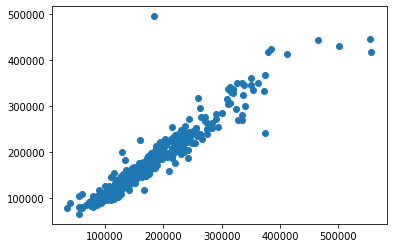

In [27]:
import lightgbm

train_data = lightgbm.Dataset(train_X, label=train_y)
test_data = lightgbm.Dataset(test_X, label=test_y)

parameters = {
    'metric': 'RMSE ',
    'boosting': 'gbdt',#'goss','dart'
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 2,
    'learning_rate': 0.05,
    'verbose': -1 #silent errors
}

modelLGBM = lightgbm.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=500,
                        verbose_eval = -1 )  #silent evaluations

y_pred2 = modelLGBM.predict(test_X)
preds3 = [round(value) for value in y_pred2]

# evaluate predictions
rms3 = mean_squared_error(test_y, preds3, squared=False) #np.sqrt(np.mean((preds3 - test_y) ** 2))
print("RMS: ", rms3)
      
g2=plt.scatter(test_y, preds3)

# Final Predict

[123994.34618187 160352.01055667 189387.00572674 ... 167631.84257066
 126522.9221275  223829.96294817]


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


<AxesSubplot:>

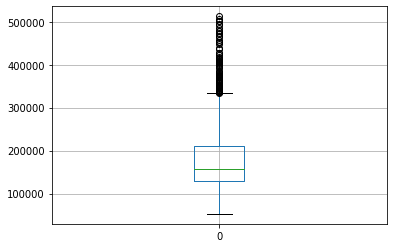

In [28]:
X2 = X_test.drop(['SalePrice'], axis = 1)
test_pool = Pool(X2) 

preds1F = modelCB.predict(test_pool)
preds2F = modelXGB.predict(X2)
preds3F = modelLGBM.predict(X2)

#predsF = (preds1F+preds2F+preds2F)/3
data = np.array([preds1F, preds2F, preds3F])
predsF = np.average(data, axis=0)

for i in range(len(predsF)):
    if predsF[[i]] < 0:
        print(i)
        predsF[[i]] = 0
print(predsF)
pd.DataFrame(predsF).boxplot(return_type='axes')

# Submission (CatBoost results)

In [29]:
output = pd.DataFrame({'Id': X_test0.index,
                      'SalePrice': preds1F})
output.set_index('Id', inplace=True)
io=2550-1461   #CORRECT OUTLIER Id 2550
output.iat[io,0] = preds1.mean()
print(output.iat[io,0])
print(len(output))
output.to_csv('submission.csv')

179930.18558711503
1459
